# Risk-Parity Model Analysis

Analysis and Visualization of the results(calculated by python) with R

In [3]:
library(dplyr) # easier data wrangling 
library(viridis) # colour blind friendly palette, works in B&W also
library(Interpol.T) #  will generate a large dataset on initial load
library(lubridate) # for easy date manipulation
library(ggExtra) # because remembering ggplot theme options is beyond me
library(tidyr) 
library(plotly)
library(hrbrthemes)
library(ggplot2)
library(readxl)
library(pheatmap)
library(reshape2)
library(RColorBrewer)
library(Cairo)


# set current path as working directory
setwd("../Risk_Parity_Model")
options (warn = -1)

In [32]:
# input data
df_index <- read.csv('../../Data/Data_Outsample.csv',  fileEncoding="UTF-8")

df_index <- na.omit(df_index)
m_index <- as.matrix(df_index[2:ncol(df_index)])

## 1. Correlation

Before creating the RP Model, we should analysis the correlation of different general asset. To make our allocation have a better performance, the correlation between general assets should not be too high, which may undermine the effect of risk diffusion.

The heatmap is used to display the correlation. And we can find most general assets have a low correlation with other assets except the China debt.

In [33]:
# correlation calculation
cor_index = cor(m_index)
recor_index = melt(cor_index)

png 
  2

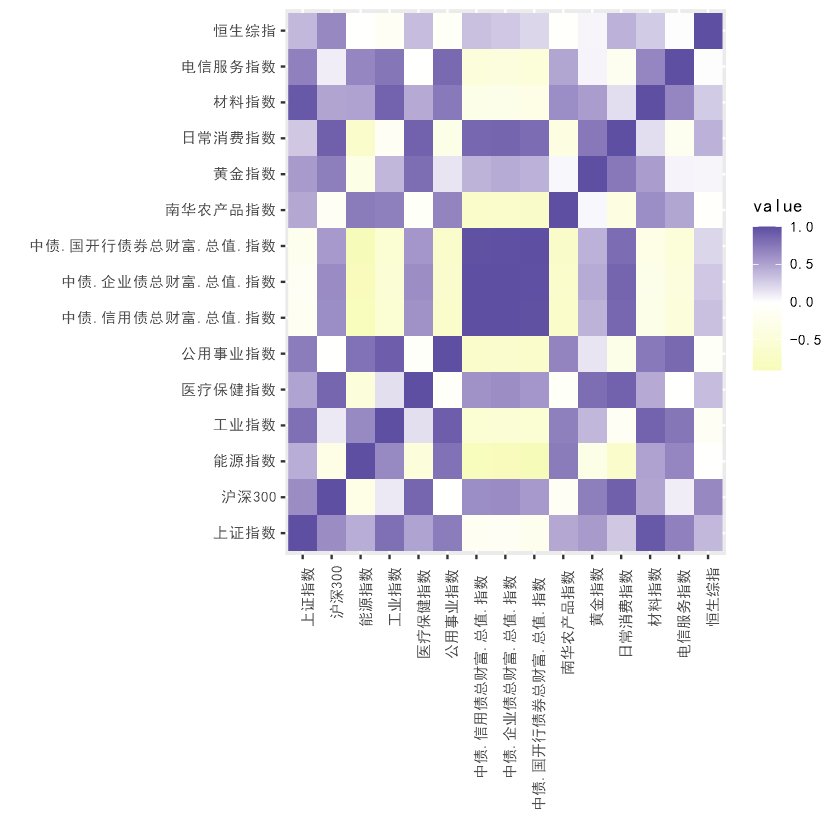

In [35]:
# correlation heatmap
CairoPDF("Heatmap_Cor_Asset.pdf",width = 7,height = 6)
ggplot(data = recor_index, aes(x=Var1, y=Var2, fill=value)) + 
    xlab("")+ ylab("") +
    scale_fill_gradient2(high = "#5E4FA2",mid="white",low="#F6FBB2")+
    theme(text=element_text(family="SimHei")) +
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1)) +
    geom_raster()
dev.off()

## 2. Position View Given by the Risk-Parity Model

In [300]:
# load and melt data
views <- read.table('view.csv',header=T,sep=",",fileEncoding="UTF-8")

colnames(views) <- c("Date",colnames(views)[2:16])

#views$Date <- as.Date(views$Date)

views_mt <- melt(views,id.vars = 1)

colnames(views_mt) = c("Date","Gp","Value")
head(views_mt)

,Date,Gp,Value
,<fct>,<fct>,<dbl>
1,2016-03-29,上证指数,0.008271712
2,2016-03-30,上证指数,0.008271712
3,2016-03-31,上证指数,0.008271712
4,2016-04-01,上证指数,0.008271712
5,2016-04-05,上证指数,0.008271712
6,2016-04-06,上证指数,0.008271712


png 
  2

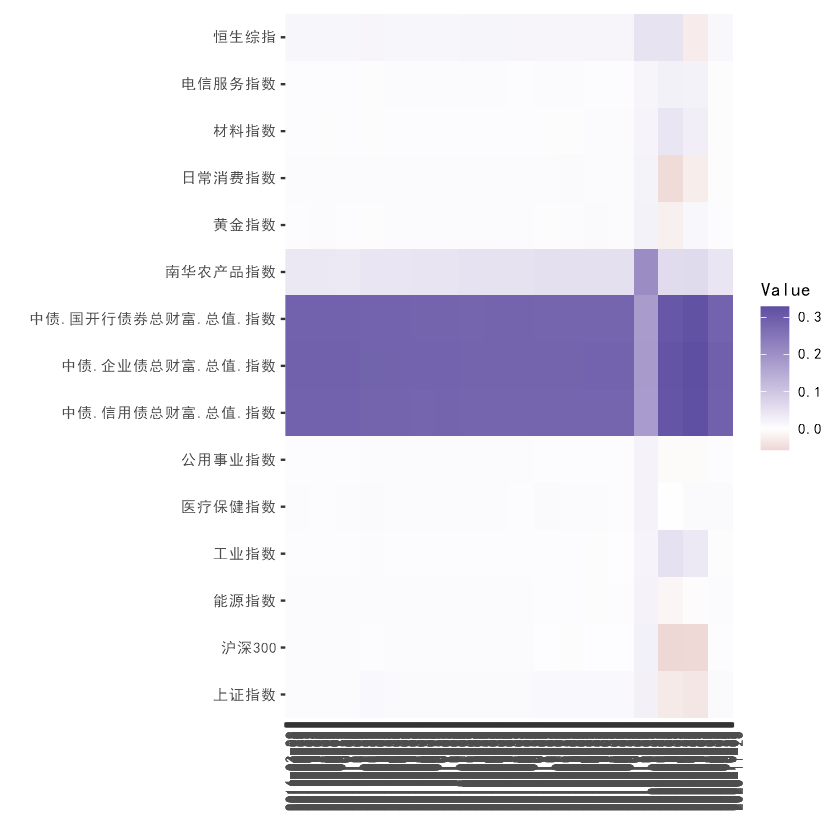

In [301]:
# plot
CairoPDF('Heatmap_RP_Weight.pdf', width= 9, height = 4)
ggplot(data = views_mt, aes(x=Date, y=Gp, fill=Value)) + 
    xlab("")+ ylab("") +
    scale_fill_gradient2(high = "#5E4FA2")+
    theme(text=element_text(family="SimHei")) +
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1)) +
    geom_raster()
dev.off()

## 3. Backtest for the Risk-Parity Model

In [6]:
asset <- read.table('RP_Asset.csv',header=T,sep=",",fileEncoding="UTF-8")
asset$Date <- as.Date(asset$Date)

asset <- melt(asset,id.vars = 1)
colnames(asset) <- c("Date","Model","Value")

png 
  2

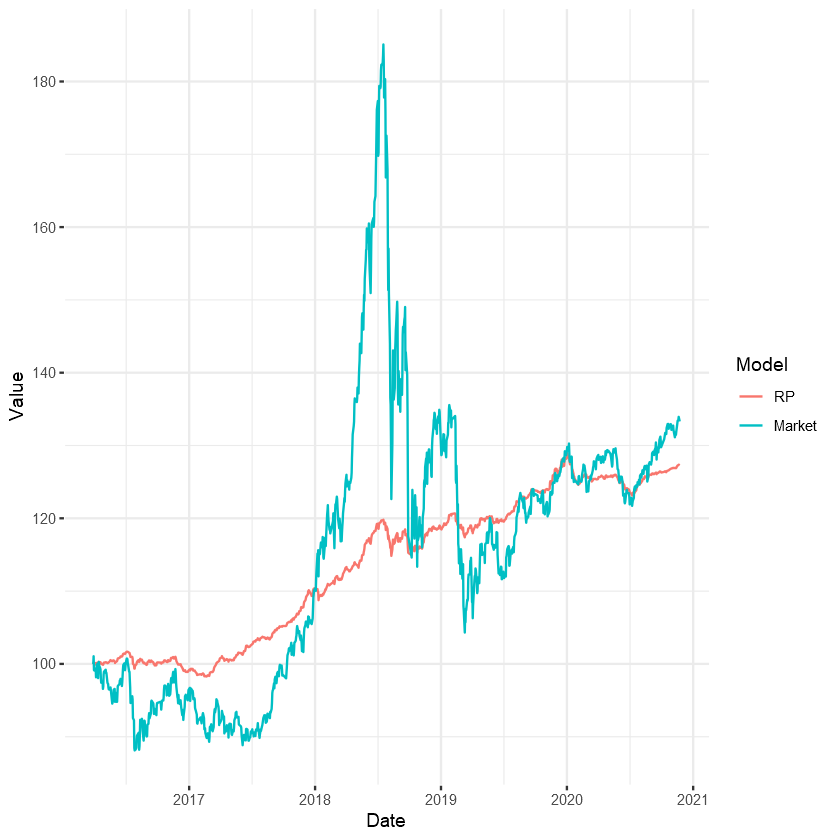

In [7]:
CairoPDF('RP_Asset.pdf', width= 9, height = 4)
ggplot() +
    geom_line(data = asset, aes(x=Date, y=Value,color=Model),) +
    theme_ipsum() + theme_bw() + theme(legend.position="right") +
    theme(panel.border = element_blank(),
          axis.line = element_line(colour = "white")) +
    theme(plot.title = element_text(size=10))
dev.off()

# 4. Time Series Weights Heatmap

In [4]:
# load data
df <- read.table('view.csv',  sep=",",header=1,fileEncoding="UTF-8")
colnames(df) <- c("Date",colnames(df)[2:length(colnames(df))])
df$Date <- ymd(df$Date)

# melt
df <- melt(df,id.vars = 1)
colnames(df) <- c("Date","Asset","Value")
df$Asset <- as.factor(df$Asset)


df <- df %>% mutate(year = year(Date),
                  month = month(Date, label=TRUE),
                  day = day(Date))

# fill missing value
df <-df %>% select(day,Asset,month,year,Value)%>%
        fill(Value) 

png 
  2

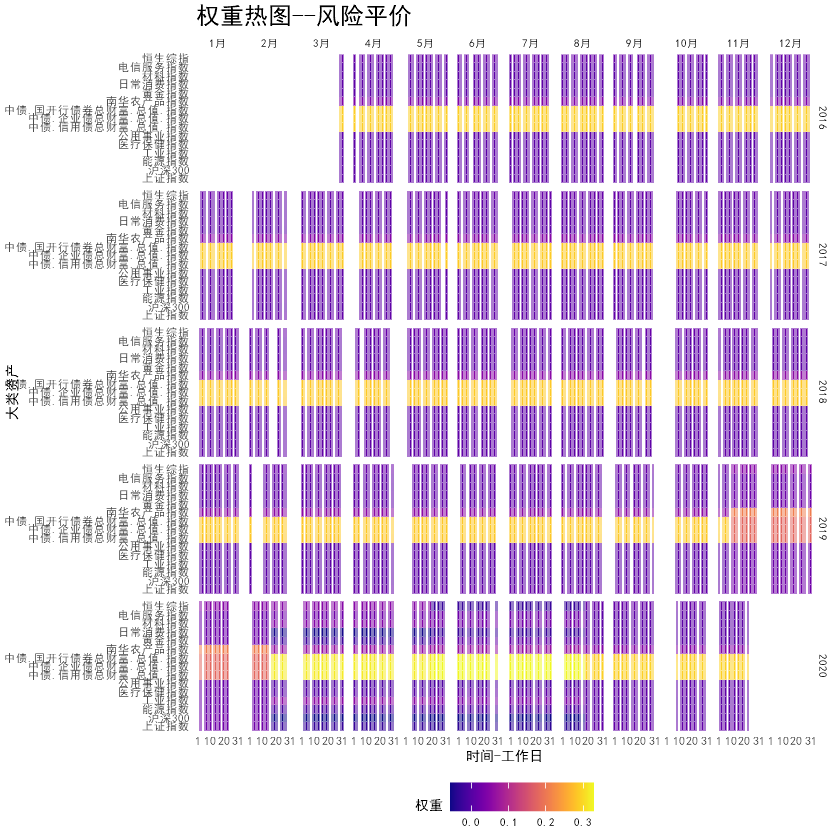

In [5]:
######## Plotting starts here#####################
options(warn=-1)
CairoPDF("Heatmap_RP_TS_Weights.pdf",width = 12,height = 11)
ggplot(df,aes(day,Asset,fill=Value))+
    geom_tile(color= "white",size=0.1) + 
    scale_fill_viridis(name="权重",option ="C") +
    facet_grid(year~month) + 
    labs(title= "权重热图--风险平价", x="时间-工作日", y="大类资产") +
    scale_y_discrete( breaks = unique(df$Asset)) +
    scale_x_continuous(breaks =c(1,10,20,31)) +
    theme_minimal(base_size = 8) + 
    theme(legend.position = "bottom")+
    theme(text=element_text(family="SimHei")) +
    theme(plot.title=element_text(size = 14))+
    theme(axis.text.y=element_text(size=6)) +
    theme(plot.title=element_text(size = 14))+
    theme(axis.text.y=element_text(size=6)) +
    theme(plot.title=element_text(size = 14))+
    theme(axis.text.y=element_text(size=6)) +
    theme(strip.background = element_rect(colour="white"))+
    theme(plot.title=element_text(hjust=0))+
    theme(axis.ticks=element_blank())+
    theme(axis.text=element_text(size=7))+
    theme(legend.title=element_text(size=8))+
    theme(legend.text=element_text(size=6))+
    removeGrid()
dev.off()